# Day 03 Trees

In [1]:
import pandas as pd
df=pd.read_csv('day3.txt',header=None)
df.columns=['orig']
df.head()

,orig
0,..#.#...#.#.#.##.....###.#....#
1,...........##.#...#.#..........
2,....#.....#..#.............#...
3,.#....###..##...#...##...#.#..#
4,#.......#.........#..#.......#.


In [2]:
# change tree/empty to ones/zeros
df['bin']=df.orig.apply(lambda x: x.replace("#","1").replace(".","0"))
df['len']=df.bin.apply(len)
forest=df.bin
forest[:10]

0    0010100010101011000001110100001
1    0000000000011010001010000000000
2    0000100000100100000000000001000
3    0100001110011000100011000101001
4    1000000010000000001001000000010
5    0001011001100010100000010110100
6    1010011000001000001001100000000
7    0001011110001011000100000000000
8    0100010010010000101010101100000
9    1101001011001000000100110101001
Name: bin, dtype: object

In [3]:
# length of rows
df.len.value_counts()

31    323
Name: len, dtype: int64

In [6]:
def numtrees(rows,right,down):
    
    # Select rows included based on DOWN instuction
    data = [rows[x] for x in range(len(rows)) if x % down==0]
    
    trees=0
    pos=0
    
    # loop through rows
    for i in range(len(data)):
        # is there a tree at current position
        res=str(data[i])[pos:pos+1]
        if res=="1":
            trees +=1
        # increment pos by RIGHT - if over 31 start from beginning
        pos+=right
        pos = pos % 31
    return trees

In [8]:
# Part 1
numtrees(forest,3,1)

178

In [9]:
# Part 2
lst=[]
for f in range(31):
    lst.append(numtrees(forest,f,1))

print(lst[1])
print(lst[3])
print(lst[5])
print(lst[7])
print(numtrees(forest,1,2))
print()
print("Product")
print (lst[1]*lst[3]*lst[5]*lst[7]*numtrees(forest,1,2))

78
178
75
86
39

Product
3492520200


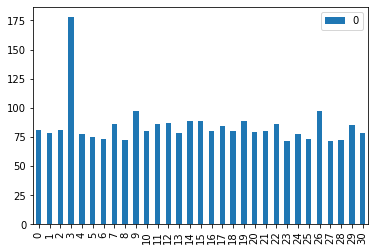

In [12]:
# distribution for all right offsets and 1 row DOWN
import matplotlib.pyplot as plt
pd.DataFrame(lst).plot(kind='bar')
plt.show()